# Introduction
In this Guided Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first mission in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks here.

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.

### Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:
<img src = "single_image.svg">

### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

<img src = "nn_learns_hierarchy.png">

You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

# Working with Image Data
Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function:
```
first_image = train.iloc[0]
first_image = first_image.drop('label', axis=1)
np_image = first_image.values
np_image = np_image.reshape(28,28)
```
Now that the data is in the right shape, we can visualize it using pyplot.imshow() function:
```
plt.imshow(np_image, cmap='gray_r')
```
To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function. Let's use what we've learned to display images from both classes.


## Tasks
- Import load_digits() from the sklearn.datasets package.
- Transform the NumPy 2D array into a pandas dataframe.
- Use matplotlib to visualize some of the images in the dataset.
  - Generate a scatter plot grid, with 2 rows and 4 columns.
  - In the first row:
    - Display the images corresponding to rows 0, 100, 200, and 300.
  - In the second row:
    - Display the images corresponding to rows 1000, 1100, 1200, and 1300.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

In [2]:
def plot_train(data, rows=4, cols = 4 ):
    """
    Plots the digits by row an col
    data -- dataframe of input numpy array
    rows -- number of rows, has to be > 1 (default 2)
    """
    _, axes = plt.subplots(rows,cols)
    img_labels = list(zip(data.images, data.target))
    for r in range(rows):
        
        for ax, (img, lbl) in zip(axes[r,:], img_labels[r:]):
            ax.set_axis_off()
            ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
            ax.set_title("Training: %i" % lbl)

#         for ax1, (img, lbl) in zip(axes[1,:], img_labels[cols:]):
#             ax1.set_axis_off()
#             ax1.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
#             ax1.set_title("Training: %i" % lbl)

    

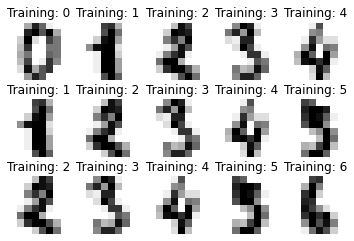

In [3]:
plot_train(digits,3,5)

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

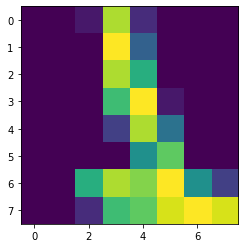

In [5]:
plt.imshow(digits.images[1000])
plt.show()

# K-Neares Neighbors Model
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier package to train and test k-nearest neighbors models.

## Tasks
- Split up the data into train and test sets.
- Setup a pipeline for testing and training k-nn models.
  - Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
  - Write a function named test() that tests the model.
  - Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
- Experiment with different values for k and plot the resulting classification accuracies.

In [6]:
features = pd.DataFrame(digits.data)
target = pd.Series(digits.target)
print("features: ", features.shape)
print("target: ", target.shape)

features:  (1797, 64)
target:  (1797,)


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
print("Train Features: ", train_features.shape)
print("Train Target: ", train_target.shape)
print("Test Features: ", test_features.shape)
print("Test Target: ", test_target.shape)

Train Features:  (1437, 64)
Train Target:  (1437,)
Test Features:  (360, 64)
Test Target:  (360,)


In [9]:
def train(features, labels, n):
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_features, train_target)
    
    return knn

In [10]:
trainme = train(features, target, 7)

In [11]:
def test(model):
    pred = model.predict(test_features)
    
    return pred

In [12]:
preed = test(trainme)

In [13]:
def cross_validate(pred):
    score = cross_val_score(trainme, features, target, cv=4)
    
    return score



In [14]:
score = cross_validate(preed)

In [15]:
def get_scores(f,t, c=4):
    neighbors = [1,5,10,15,20,25,30,50,100]
    scores = []


    for n in neighbors:
        model = train(f, f, n)
        score = cross_val_score(model, f, t, cv=c)
        scores.append(score)
    return scores, neighbors
    

In [16]:
scores, neighbors = get_scores(features, target, 4)

In [17]:
def plot_scores(n, s):
    plt.figure()
    plt.plot(n, s)

    plt.ylabel("CV Score")
    plt.xlabel("Number of Neighbors")

    plt.show()

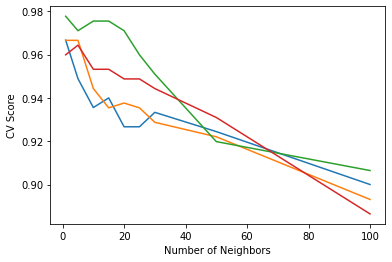

In [18]:
plot_scores(neighbors, scores)

In [19]:
scores1, neighbors1 = get_scores(features, target, 10)

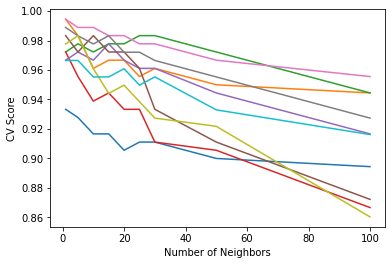

In [20]:
plot_scores(neighbors1, scores1)

# Neural Network With One Hidden Layer
There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

## Tasks
Using 4-fold cross validation:
- Train and test a neural network model using a single hidden layer of 8 neurons.
- Train and test a neural network model using a single hidden layer of 16 neurons.
- Train and test a neural network model using a single hidden layer of 32 neurons.
- Train and test a neural network model using a single hidden layer of 64 neurons.
- Train and test a neural network model using a single hidden layer of 128 neurons.
- Train and test a neural network model using a single hidden layer of 256 neurons.

Create a new Markdown cell summarizing what you saw.
- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
  - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error

In [22]:
neurons = [8,16,32,64,128,256]

In [23]:
def train_nn(n_list):
    t_scores = []
    f_scores = []
    rmses = []
    for n in n_list:
        clf = MLPClassifier(hidden_layer_sizes=(n,), max_iter = 200, random_state=1)
        clf.fit(train_features, train_target)
        pred = clf.predict(test_features)
        t_score = clf.score(test_features,test_target)
        t_scores.append(t_score*100)
        f_score = clf.score(train_features,train_target)
        f_scores.append(f_score*100)
        rmse = mean_squared_error(pred, test_target, squared=False)
        rmses.append(rmse)
    return dict(zip(neurons, t_scores)), dict(zip(neurons, f_scores)), dict(zip(neurons, rmses))

In [24]:
test_score, train_score, rmse = train_nn(neurons)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
test_score

{8: 80.83333333333333,
 16: 95.55555555555556,
 32: 96.66666666666667,
 64: 97.22222222222221,
 128: 97.5,
 256: 97.5}

In [26]:
train_score

{8: 88.51774530271399,
 16: 99.37369519832986,
 32: 100.0,
 64: 100.0,
 128: 100.0,
 256: 100.0}

### The Model is clearly overfitting past 16 Neurons

In [27]:
rmse

{8: 1.9677962857527256,
 16: 1.0124228365658292,
 32: 0.7011894655987543,
 64: 0.6561673228343176,
 128: 0.5797509043642028,
 256: 0.6213783960769083}

In [28]:
def create_coordinates(d):
    l = d.items()
    x, y = zip(*l)
    return x, y

test_x, test_y = create_coordinates(test_score)
train_x, train_y = create_coordinates(train_score)

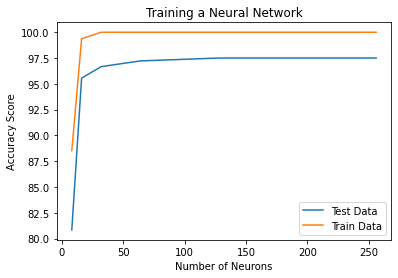

In [29]:
plt.figure()

ax1=plt.plot(test_x, test_y, label="Test Data")
ax2=plt.plot(train_x, train_y, label="Train Data")
plt.title("Training a Neural Network")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")
plt.legend()
plt.show()

# Neural Network With Two Hidden Layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

## Tasks
- Modify the neural network training pipeline to use 2 hidden layers instead in the network.
- Using 4-fold cross validation:
  - Train a neural network model using 2 hidden layers:
    - 64 neurons in the first hidden layer.
    - 64 neurons in the second hidden layer.

Create a new Markdown cell summarizing what you saw.
- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
  - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [30]:
def train_2hl(n_list):
    t_scores = []
    f_scores = []
    rmses = []
    for n in n_list:
        clf = MLPClassifier(hidden_layer_sizes=(n,n), max_iter = 200, random_state=1)
        clf.fit(train_features, train_target)
        pred = clf.predict(test_features)
        t_score = clf.score(test_features,test_target)
        t_scores.append(t_score*100)
        f_score = clf.score(train_features,train_target)
        f_scores.append(f_score*100)
        rmse = mean_squared_error(pred, test_target, squared=False)
        rmses.append(rmse)
    return dict(zip(neurons, t_scores)), dict(zip(neurons, f_scores)), dict(zip(neurons, rmses))

In [31]:
test2hl_score, train2hl_scores, rmse2hl = train_2hl(neurons)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
test2hl_score

{8: 90.0,
 16: 95.27777777777777,
 32: 97.77777777777777,
 64: 97.77777777777777,
 128: 97.77777777777777,
 256: 97.77777777777777}

In [33]:
train2hl_scores

{8: 95.68545581071677, 16: 100.0, 32: 100.0, 64: 100.0, 128: 100.0, 256: 100.0}

In [34]:
rmse2hl

{8: 1.5009256403225903,
 16: 0.7453559924999299,
 32: 0.5892556509887896,
 64: 0.6078194176270156,
 128: 0.5892556509887896,
 256: 0.5477225575051661}

In [35]:
def get_scores_nn(f,t, c=4):
    scores = []
    for n in neurons:
        model = MLPClassifier(hidden_layer_sizes=(n,n), max_iter = 200, random_state=1)
        score = cross_val_score(model, f, t, cv=c)
        scores.append(score)
    return dict(zip(neurons,scores))

In [38]:
cv_scores = get_scores_nn(features, target)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

In [39]:
cv_scores

{8: array([0.85333333, 0.82628062, 0.92650334, 0.87750557]),
 16: array([0.91777778, 0.89755011, 0.9532294 , 0.8908686 ]),
 32: array([0.92222222, 0.90423163, 0.9376392 , 0.93318486]),
 64: array([0.95333333, 0.93986637, 0.95545657, 0.922049  ]),
 128: array([0.96666667, 0.94654788, 0.96436526, 0.92873051]),
 256: array([0.96666667, 0.93986637, 0.97550111, 0.93986637])}

In [40]:
x, y = create_coordinates(cv_scores)

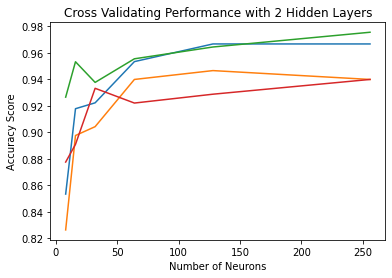

In [44]:
plt.figure()

plt.plot(x,y)
plt.title("Cross Validating Performance with 2 Hidden Layers")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")

plt.show()

# Neural Network With Three Hidden Layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

## Tasks
- Modify the neural network training pipeline to use 6 fold cross validation instead.
- Train a neural network model using 3 hidden layers:
  - 10 neurons in the first hidden layer.
  - 10 neurons in the second hidden layer.
  - 10 neurons in the third hidden layer.
- Train a neural network model using 3 hidden layers:
  - 64 neurons in the first hidden layer.
  - 64 neurons in the second hidden layer.
  - 64 neurons in the third hidden layer.
- Train a neural network model using 3 hidden layers:
  - 128 neurons in the first hidden layer.
  - 128 neurons in the second hidden layer.
  - 128 neurons in the third hidden layer.

Create a new Markdown cell summarizing what you saw.
- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
  - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [59]:
def train_3hl(n):
    
    t_scores = []
    f_scores = []
    rmses = []
    for n in neurons:
        clf = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter = 200, random_state=1)
        clf.fit(train_features, train_target)
        pred = clf.predict(test_features)
        t_score = clf.score(test_features,test_target)
        t_scores.append(t_score*100)
        f_score = clf.score(train_features,train_target)
        f_scores.append(f_score*100)
        rmse = mean_squared_error(pred, test_target, squared=False)
        rmses.append(rmse)
    return dict(zip(neurons, t_scores)), dict(zip(neurons, f_scores)), dict(zip(neurons, rmses))

In [60]:
neuronen = [10,64,128]

In [61]:
def get_scores_nn(f,t, c=4):
    scores = []
    for n in neuronen:
        model = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter = 200, random_state=1)
        score = cross_val_score(model, f, t, cv=c)
        scores.append(score)
    return dict(zip(neuronen,scores))

In [54]:
cv_score_3HL = get_scores_nn(features, target, c=6)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

In [55]:
cv_score_3HL

{10: array([0.89333333, 0.90666667, 0.88      , 0.93645485, 0.93979933,
        0.88294314]),
 64: array([0.95      , 0.94666667, 0.95333333, 0.97324415, 0.97993311,
        0.91973244]),
 128: array([0.94666667, 0.97333333, 0.95666667, 0.95986622, 0.97658863,
        0.91973244])}

In [56]:
x, y = create_coordinates(cv_score_3HL)

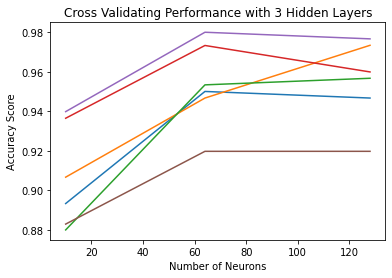

In [57]:
plt.figure()

plt.plot(x,y)
plt.title("Cross Validating Performance with 3 Hidden Layers")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")

plt.show()

### Looks like performance decreases after 64 Neurons

In [62]:
test3hl_score, train3hl_scores, rmse3hl = train_3hl(neuronen)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
test3hl_score

{8: 91.66666666666666,
 16: 96.11111111111111,
 32: 96.38888888888889,
 64: 97.5,
 128: 98.61111111111111,
 256: 97.77777777777777}

In [65]:
train3hl_scores

{8: 96.10299234516354, 16: 100.0, 32: 100.0, 64: 100.0, 128: 100.0, 256: 100.0}

In [66]:
rmse3hl

{8: 1.1832159566199232,
 16: 0.8740073734751262,
 32: 0.7453559924999299,
 64: 0.6324555320336759,
 128: 0.39440531887330776,
 256: 0.45946829173634074}

In [67]:
test_x, test_y = create_coordinates(test3hl_score)
train_x, train_y = create_coordinates(train3hl_scores)


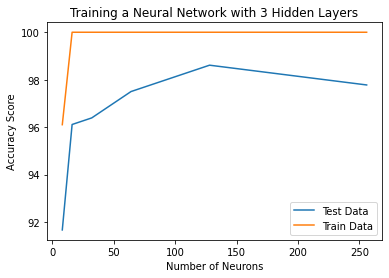

In [68]:
plt.figure()

ax1=plt.plot(test_x, test_y, label="Test Data")
ax2=plt.plot(train_x, train_y, label="Train Data")
plt.title("Training a Neural Network with 3 Hidden Layers")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")
plt.legend()
plt.show()

### With 3 Hidden Layers, Overfitting seems to start after 10 Neurons